In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('IRIS.csv')
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='species', ylabel='count'>

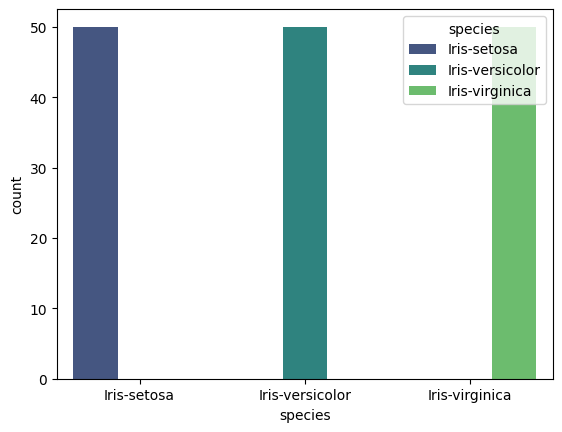

In [61]:
sns.countplot(x= data['species'],data=data,hue='species',palette='viridis')

In [4]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='petal_length', ylabel='petal_width'>

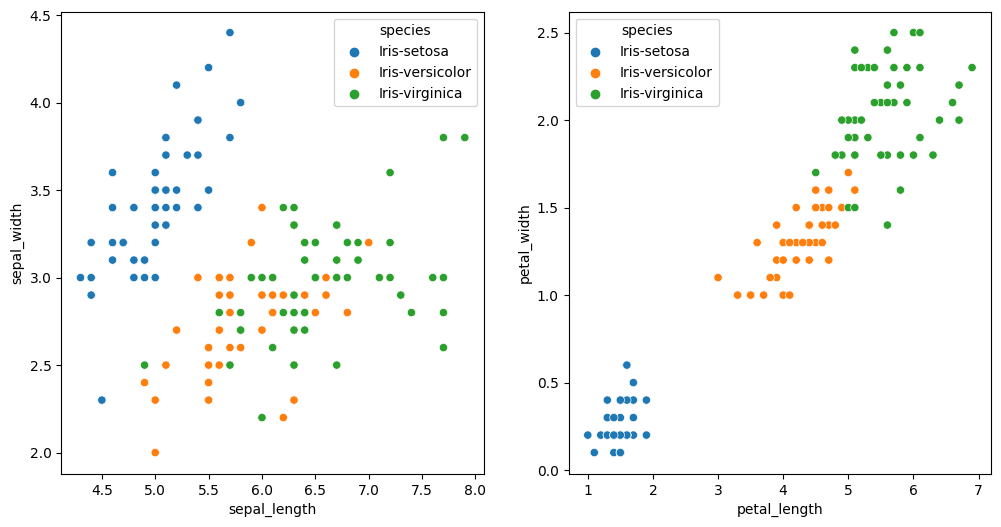

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data['sepal_length'], y=data['sepal_width'], hue=data['species'])
plt.subplot(1,2,2)
sns.scatterplot(x=data['petal_length'], y=data['petal_width'], hue=data['species'])

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:

df = pd.read_csv('IRIS.csv')
# print(df.head())

# Drop the 'species' column and map it to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
print(df['species'])

# Feature selection
X = df.drop(columns=['species'])
y = df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [42]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
39,5.1,3.4,1.5,0.2,0
80,5.5,2.4,3.8,1.1,1
115,6.4,3.2,5.3,2.3,2
74,6.4,2.9,4.3,1.3,1
36,5.5,3.5,1.3,0.2,0
95,5.7,3.0,4.2,1.2,1
29,4.7,3.2,1.6,0.2,0
83,6.0,2.7,5.1,1.6,1
144,6.7,3.3,5.7,2.5,2
85,6.0,3.4,4.5,1.6,1


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# Function to predict species of a new Iris flower
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    new_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                            columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    new_data = scaler.transform(new_data)
    predicted_species = model.predict(new_data)
    return label_encoder.inverse_transform(predicted_species)[0]

# Example usage
print(predict_species(5.1, 3.5, 1.4, 0.2))

Iris-setosa
